# ADC-DAC校准
先读取原始数据（正向递增的部分）

In [36]:
temp = 4096

dac_val = []
adc_val = []
with open('ADC_cal.txt') as topo_file:
    for line in topo_file:
        
        temp = temp -1
        if temp < 0:
            break
        # print(line)
        mylist = line.split(" ")
        if mylist[0] == "DAC":
            dac_val.append(mylist[2]) 
            adc_val.append(mylist[5]) 
            # print(mylist[2])
            # print(mylist[5])
        

然后，转换为np array的格式

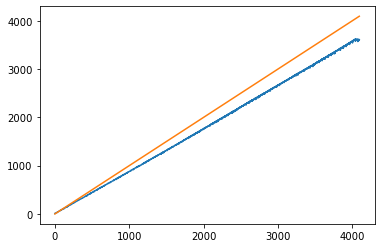

In [37]:
import matplotlib.pyplot as plt
import numpy as np

dac_val = list(map(int, dac_val))
adc_val = list(map(int, adc_val))
dac_val = np.array(dac_val)
adc_val = np.array(adc_val)/10
plt.plot(dac_val,adc_val)
plt.plot(dac_val,dac_val)

然后进行线性回归分析。得到斜率为1.122，截距为10.8。

In [38]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(adc_val, dac_val)
print(slope)
print(intercept)

1.1221968149223458
10.836754074817463


先读取原始数据（递减的部分）

In [39]:
with open('ADC_cal.txt') as fp:
    # read line number 3 to 5
    # index starts from 0
    x = fp.readlines()[4096:4096+4096]

dac_val = []
adc_val = []
for line in x:
    mylist = line.split(" ")
    if mylist[0] == "DAC":
        dac_val.append(mylist[2]) 
        adc_val.append(mylist[5]) 


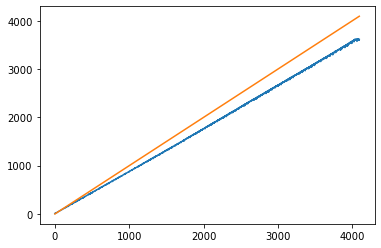

In [40]:
import matplotlib.pyplot as plt
import numpy as np

dac_val = list(map(int, dac_val))
adc_val = list(map(int, adc_val))
dac_val = np.array(dac_val)
adc_val = np.array(adc_val)/10
plt.plot(dac_val,adc_val)
plt.plot(dac_val,dac_val)

然后进行线性回归分析。得到斜率为1.122，截距为10.2。与递增测试，所得分析结果1.122，10.8非常接近。

In [41]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(adc_val, dac_val)
print(slope)
print(intercept)

1.1224821771602642
10.220005647446442
